In [2]:
from Bio import AlignIO
from Bio.Align import AlignInfo 
from multiprocessing import Pool
from Bio import motifs
from Bio.Seq import Seq
import pickle
import numpy as np
import glob
import os 
import pandas as pd
from Bio import SeqIO
import csv
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


#from pssm import *


In [1]:
def scale_by
(x_ar):
    # sigmod function 
    return 1 / (1 + np.exp(x_ar * -1)) 

def convert_to20X20_(pssm , index_pattern):
    """
    
    pssm: dcit
        get pssm as dict 
    """
    char_code_list = [char for char in "ACDEFGHIKLMNPQRSTVWY"] 
    pssm_df = pd.DataFrame.from_dict(pssm)
    pssm_df.index = index_pattern
    result_df = pd.DataFrame(0, columns=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],
    index = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
    for  char in char_code_list: # column
        for index, row in pssm_df.iterrows():
            result_df.loc[index, char] += round(row[char],4)
    return result_df

def get_pssm(m):
    pwm = m.counts.normalize(pseudocounts=0.05)
    pssm = pwm.log_odds()
    return pssm

def create_image(df,file):
    plt.axis("off")
    plt.imshow(df)
    plt.savefig(file, bbox_inches='tight', pad_inches=0)

In [9]:
def convert_to20X20_test(pssm , index_pattern):
    """
    
    pssm: dcit
        get pssm as dict 
    """
    char_code_list = [char for char in "ACDEFGHIKLMNPQRSTVWY"] 
    pssm_df = pd.DataFrame.from_dict(pssm)
    pssm_df.index = index_pattern
    result_df = pd.DataFrame(0, columns=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],
    index = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
    for  char in char_code_list: # column
        for index, row in pssm_df.iterrows():
            print(row)
            print(char)
            print(row[char])
            result_df.loc[index, char] += round(row[char],4)
    return result_df

In [11]:
test = 'YVPL'

    
m = motifs.create( [test], alphabet="ACDEFGHIKLMNPQRSTVWY")
index_pattern = [char for char in m.consensus] 
    
pssm = get_pssm(m)
result_df = convert_to20X20_test(pssm , index_pattern)


A   -1.000000
C   -1.000000
D   -1.000000
E   -1.000000
F   -1.000000
G   -1.000000
H   -1.000000
I   -1.000000
K   -1.000000
L   -1.000000
M   -1.000000
N   -1.000000
P   -1.000000
Q   -1.000000
R   -1.000000
S   -1.000000
T   -1.000000
V   -1.000000
W   -1.000000
Y    3.392317
Name: Y, dtype: float64
A
-1.0000000000000002
A   -1.000000
C   -1.000000
D   -1.000000
E   -1.000000
F   -1.000000
G   -1.000000
H   -1.000000
I   -1.000000
K   -1.000000
L   -1.000000
M   -1.000000
N   -1.000000
P   -1.000000
Q   -1.000000
R   -1.000000
S   -1.000000
T   -1.000000
V    3.392317
W   -1.000000
Y   -1.000000
Name: V, dtype: float64
A
-1.0000000000000002
A   -1.000000
C   -1.000000
D   -1.000000
E   -1.000000
F   -1.000000
G   -1.000000
H   -1.000000
I   -1.000000
K   -1.000000
L   -1.000000
M   -1.000000
N   -1.000000
P    3.392317
Q   -1.000000
R   -1.000000
S   -1.000000
T   -1.000000
V   -1.000000
W   -1.000000
Y   -1.000000
Name: P, dtype: float64
A
-1.0
A   -1.000000
C   -1.000000
D   -1.00

In [6]:
print(pssm)

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33
A:  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00
C:  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00
D:  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00  -1.00
E:  -1.00  -1.00  -1.00  -1.00  -1.0

In [11]:
data_path="../../datasets/truthset/truthset.csv"
AMPs_df=pd.read_csv(data_path,sep=',',header=0)
AMPs_df 

,ID,paper,seq
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKR...
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY
...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC


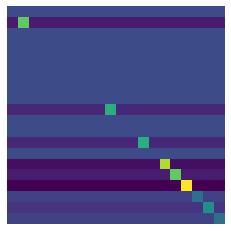

In [13]:
# ready_df = pd.DataFrame(columns = ['ID', 'Sequence','reps', 'length'])
ready_df = AMPs_df.copy()
_flat = []
for i, row in ready_df.iterrows():
    
    m = motifs.create( [row['seq']], alphabet="ACDEFGHIKLMNPQRSTVWY")
    index_pattern = [char for char in m.consensus] 
    
    file_name = '../../datasets/truthset/images/'+row['ID']+'.png'
    
    pssm = get_pssm(m)
    result_df = convert_to20X20_(pssm , index_pattern)
    result_df = scale_by(result_df/len(m.consensus))
    create_image(result_df,file_name) 
            
    flat = result_df.values.flatten()
    _flat.append(flat)
    
ready_df['reps'] = _flat

In [17]:
!pip install Pillow

In [24]:
from PIL import Image
file_test = '../../datasets/truthset/images/AMP/Attacin-like_g1.png'
test_image = Image.open(file_test)
pix = test_image.load()
print(test_image.size)  # Get the width and hight of the image for iterating over

(217, 217)


In [26]:
pix[0,1]

(38, 172, 129, 255)

In [31]:
pix[20,100]

(68, 57, 130, 255)

In [7]:
ready_df

,ID,paper,seq,reps
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKR...,"[0.5506754102838333, 0.4850044983805899, 0.485..."
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,"[0.5496883950645269, 0.4852983566307939, 0.485..."
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET,"[0.5192518413309044, 0.4943184263741699, 0.494..."
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
...,...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,"[0.5575282030158855, 0.4829611457389907, 0.482..."
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [16]:
ready_df

,ID,paper,seq,reps
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKR...,"[0.5506754102838333, 0.4850044983805899, 0.485..."
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,"[0.5496883950645269, 0.4852983566307939, 0.485..."
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET,"[0.5192518413309044, 0.4943184263741699, 0.494..."
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
...,...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,"[0.5575282030158855, 0.4829611457389907, 0.482..."
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [17]:
output = open("../../datasets/truthset/pssm/AMPs.truthset.reps.pkl", 'wb')
pickle.dump(ready_df, output)
output.close()

# Benchmark set 920

In [5]:
data_path="../../datasets/thesis/trainingset2/benchmark_set/920_920/ready_df.pkl"
AMPs_df = pd.read_pickle(data_path)
AMPs_df 

,ID,Sequence,length,class
0,AP00002,YVPLPNVPQPGRRPFPTFPGQGPFNPKIKWPQGY,34,0
1,AP00007,GNNRPVYIPQPRPPHPRL,18,0
2,AP00009,RFRPPIRRPPIRPPFYPPFRPPIRPPIFPPIRPPFRPPLGPFP,43,0
3,AP00010,RRIRPRPPRLPRPRPRPLPFPRPGPRPIPRPLPFPRPGPRPIPRPL...,60,0
4,AP00011,WNPFKELERAGQRVRDAVISAAPAVATVGQAAAIARG,37,0
...,...,...,...,...
1835,P17387,MRGETPTLQDYVLDLQPEATDLHCYEQLPDSSDEEDVIDSPAGQAE...,98,1
1836,P26557,MRGNNPTLREYILDLHPEPTDLFCYEQLCDSSDEDEIGLDGPDGQA...,98,1
1837,P06464,MHGRHVTLKDIVLDLQPPDPVGLHCYEQLVDSSEDEVDEVDGQDSQ...,98,1
1838,P86826,YDRYEVVYR,9,1


/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


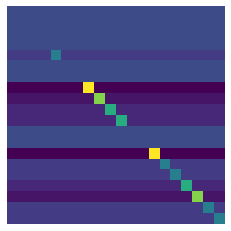

In [10]:
# ready_df = pd.DataFrame(columns = ['ID', 'Sequence','reps', 'length'])
AMP_ready_df = AMPs_df[AMPs_df["class"] == 0]
_flat = []
for i, row in AMP_ready_df.iterrows():
    
    m = motifs.create( [row['Sequence']], alphabet="ACDEFGHIKLMNPQRSTVWY")
    index_pattern = [char for char in m.consensus] 
    
    file_name = '/mnt/vdb/thesis/trainingset2/benchmark_set_920/pssm/amp/'+row['ID']+'.png'
    
    pssm = get_pssm(m)
    result_df = convert_to20X20_(pssm , index_pattern)
    result_df = scale_by(result_df/len(m.consensus))
    create_image(result_df,file_name) 
            
    flat = result_df.values.flatten()
    _flat.append(flat)

#output = open("../../datasets/thesis/trainingset2/benchmark_set/AMPs.benchmark.reps.pkl", 'wb')
#pickle.dump(AMP_ready_df, output)
#output.close()
AMP_ready_df['reps'] = _flat

## Benchmark set 1770

In [6]:
data_path="../../datasets/thesis/trainingset2/benchmark_set/benchmark_set_1777.pkl"
AMPs_df = pd.read_pickle(data_path)
AMPs_df 

,ID,Sequence,length,class
0,AP01235,FNKLKQGSSKRTCAKCFRKIMPSVHELDERRRGANRWAAGFRKCVS...,51,0
1,AP02387,RLGTALPALLKTLLAGLNG,19,0
2,AP02150,YEALVTSILGKLTGLWHNDSVDFMGHICYFRRRPKIRRFKLYHEGK...,65,0
3,AP00314,VFCTCRGFLCGSGERASGSCTINGVRHTLCCRR,33,0
4,AP01183,ATYYGNGLYCNKEKCWVDWNQAKGEIGKIIVNGWVNHGPWAPRR,44,0
...,...,...,...,...
3551,UniRef50_Q9RZN1,GDVEKVDPTTANLLQ,15,1
3552,UniRef50_P38903,RIYGKFLSLRSFIRRSMNNIFLQF,24,1
3553,UniRef50_O75398,NVFTTSVANAASISGHVLSGRTALQIGDSLNTEKATLIVVHTDGSI...,62,1
3554,UniRef50_P61308,GNDKIKKVELTKDLETFYLNQIQTLTD,27,1


/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


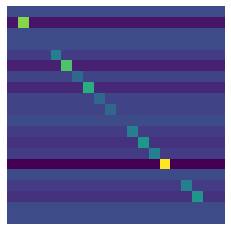

In [10]:
# ready_df = pd.DataFrame(columns = ['ID', 'Sequence','reps', 'length'])
AMP_ready_df = AMPs_df[AMPs_df["class"] == 0]
_flat = []
for i, row in AMP_ready_df.iterrows():
    
    m = motifs.create( [row['Sequence']], alphabet="ACDEFGHIKLMNPQRSTVWY")
    index_pattern = [char for char in m.consensus] 
    
    file_name = '../../datasets/thesis/trainingset2/benchmark_set/amp/'+row['ID']+'.png'
    
    pssm = get_pssm(m)
    result_df = convert_to20X20_(pssm , index_pattern)
    result_df = scale_by(result_df/len(m.consensus))
    create_image(result_df,file_name) 
            
    flat = result_df.values.flatten()
    _flat.append(flat)

#output = open("../../datasets/thesis/trainingset2/benchmark_set/AMPs.benchmark.reps.pkl", 'wb')
#pickle.dump(AMP_ready_df, output)
#output.close()
AMP_ready_df['reps'] = _flat

/home/ubuntu/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


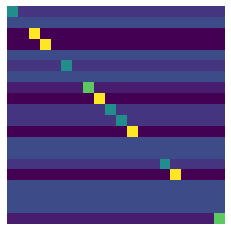

In [11]:
# ready_df = pd.DataFrame(columns = ['ID', 'Sequence','reps', 'length'])
nonAMP_ready_df = AMPs_df[AMPs_df["class"] == 1]
_flat = []
for i, row in nonAMP_ready_df.iterrows():
    
    m = motifs.create( [row['Sequence']], alphabet="ACDEFGHIKLMNPQRSTVWY")
    index_pattern = [char for char in m.consensus] 
    
    file_name = '../../datasets/thesis/trainingset2/benchmark_set/nonamp/'+row['ID']+'.png'
    
    pssm = get_pssm(m)
    result_df = convert_to20X20_(pssm , index_pattern)
    result_df = scale_by(result_df/len(m.consensus))
    create_image(result_df,file_name) 
            
    flat = result_df.values.flatten()
    _flat.append(flat)

#output = open("../../datasets/thesis/trainingset2/benchmark_set/nonAMPs.benchmark.reps.pkl", 'wb')
#pickle.dump(nonAMP_ready_df, output)
#output.close()
nonAMP_ready_df['reps'] = _flat

In [15]:

AMPNonAMP_df = pd.concat([AMP_ready_df, nonAMP_ready_df], ignore_index=True)
output = open("../../datasets/thesis/trainingset2/benchmark_set/AMPnonAMP.pssm.pkl", 'wb')
pickle.dump(AMPNonAMP_df, output)
output.close()